In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score, accuracy_score
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("../data/user_visit_duration.csv")

In [3]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


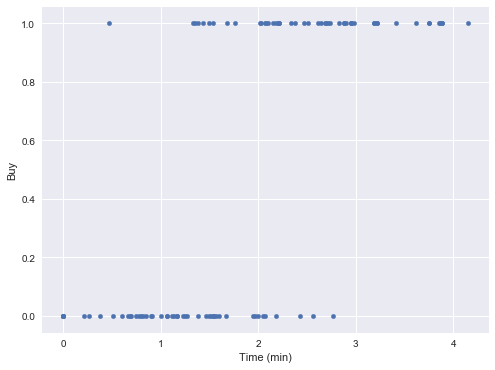

In [5]:
df.plot(kind='scatter', x='Time (min)', y='Buy', figsize=(8,6))

In [7]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [8]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
X = df['Time (min)']
y = df['Buy']
model.fit(X, y, epochs=50, verbose=0)

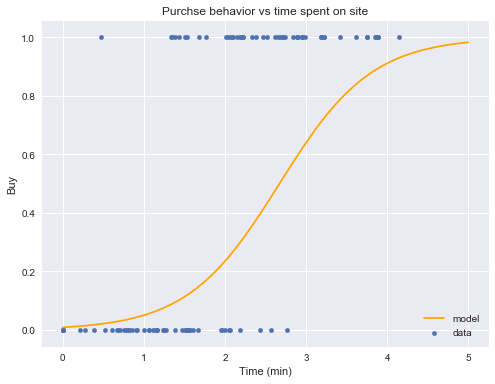

In [18]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy', figsize=(8,6), title="Purchse behavior vs time spent on site")
temp = np.linspace(0,5)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [21]:
temp_class = model.predict(temp) > 0.5

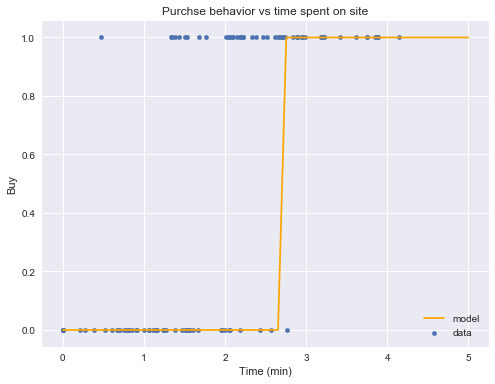

In [23]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy', figsize=(8,6), title="Purchse behavior vs time spent on site")
temp = np.linspace(0,5)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [20]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [25]:
# import accuracy score above
print("The accuracy score {}".format(accuracy_score(y, y_class_pred)))

The accuracy score 0.74


In [26]:
X_train, X_test, y_train, y_test = train_test_split(df['Time (min)'], df['Buy'], test_size=0.2)

In [28]:
params = model.weights

In [30]:
for x in params:
    print(x.shape)

(1, 1)
(1,)


In [31]:
params = [np.zeros(x.shape) for x in params]
model.set_weights(params)

In [34]:
print("The accuracy score {}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score 0.5


In [35]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [37]:
print("the train accuracy score is {}".format(accuracy_score(y_train, model.predict(X_train)>0.5)))
print("the test accuracy score is {}".format(accuracy_score(y_test, model.predict(X_test)>0.5)))

the train accuracy score is 0.8375
the test accuracy score is 0.75
